In [6]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

##### Insets

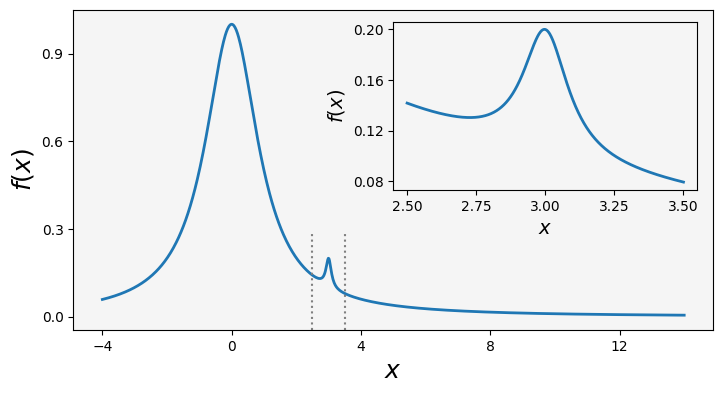

In [8]:
fig = plt.figure(figsize=(8, 4))
def f(x):
    return 1/(1 + x**2) + 0.1/(1 + ((3 - x)/0.1)**2)

def plot_and_format_axes(ax, x, f, fontsize):
    ax.plot(x, f(x), linewidth=2)
    ax.xaxis.set_major_locator(mpl.ticker.MaxNLocator(5))
    ax.yaxis.set_major_locator(mpl.ticker.MaxNLocator(4))
    ax.set_xlabel(r"$x$", fontsize=fontsize)
    ax.set_ylabel(r"$f(x)$", fontsize=fontsize)

# main graph
ax = fig.add_axes([0.1, 0.15, 0.8, 0.8], facecolor="#f5f5f5")
x = np.linspace(-4, 14, 1000)
plot_and_format_axes(ax, x, f, 18)

# inset
x0, x1 = 2.5, 3.5
ax.axvline(x0, ymax=0.3, color="grey", linestyle=":")
ax.axvline(x1, ymax=0.3, color="grey", linestyle=":")

ax_insert = fig.add_axes([0.5, 0.5, 0.38, 0.42], facecolor='none')
x = np.linspace(x0, x1, 1000)
plot_and_format_axes(ax_insert, x, f, 14)

##### Subplots

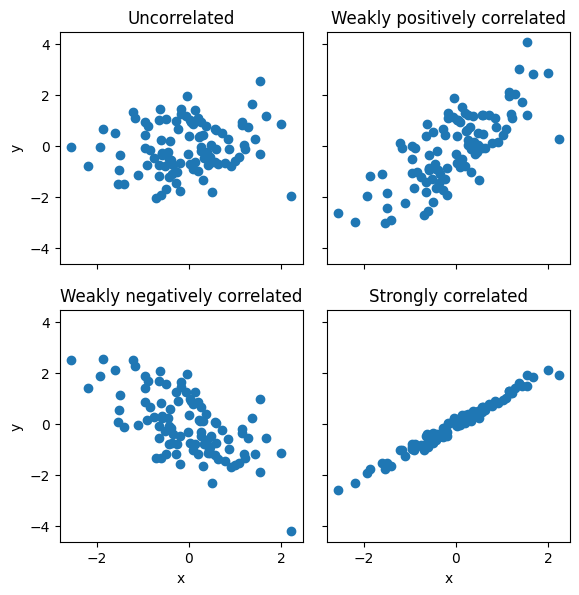

In [9]:
fig, axes = plt.subplots(2, 2, figsize=(6, 6), sharex=True,
sharey=True, squeeze=False)

x1 = np.random.randn(100)
x2 = np.random.randn(100)

axes[0, 0].set_title("Uncorrelated")
axes[0, 0].scatter(x1, x2)

axes[0, 1].set_title("Weakly positively correlated")
axes[0, 1].scatter(x1, x1 + x2)

axes[1, 0].set_title("Weakly negatively correlated")
axes[1, 0].scatter(x1, -x1 + x2)

axes[1, 1].set_title("Strongly correlated")
axes[1, 1].scatter(x1, x1 + 0.15 * x2)

axes[1, 1].set_xlabel("x")
axes[1, 0].set_xlabel("x")
axes[0, 0].set_ylabel("y")
axes[1, 0].set_ylabel("y")

plt.subplots_adjust(left=0.1, right=0.95, bottom=0.1, top=0.95,
wspace=0.1, hspace=0.2)

##### Subplot2Grid

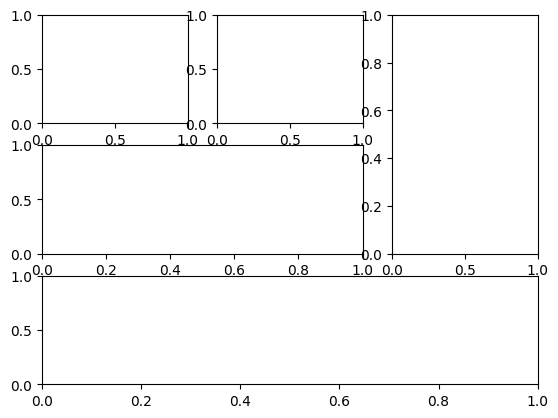

In [10]:
ax0 = plt.subplot2grid((3, 3), (0, 0))
ax1 = plt.subplot2grid((3, 3), (0, 1))
ax2 = plt.subplot2grid((3, 3), (1, 0),
colspan=2)
ax3 = plt.subplot2grid((3, 3), (2, 0),
colspan=3)
ax4 = plt.subplot2grid((3, 3), (0, 2),
rowspan=2)

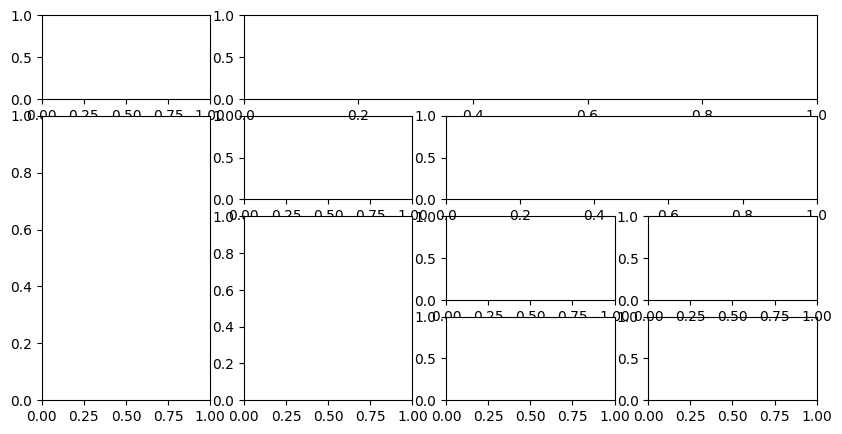

<Figure size 400x400 with 0 Axes>

In [15]:
fig = plt.figure(figsize=(10, 5))
gs = mpl.gridspec.GridSpec(4, 4)
ax0 = fig.add_subplot(gs[0, 0])
ax1 = fig.add_subplot(gs[1, 1])
ax2 = fig.add_subplot(gs[2, 2])
ax3 = fig.add_subplot(gs[3, 3])
ax4 = fig.add_subplot(gs[0, 1:])
ax5 = fig.add_subplot(gs[1:, 0])
ax6 = fig.add_subplot(gs[1, 2:])
ax7 = fig.add_subplot(gs[2:, 1])
ax8 = fig.add_subplot(gs[2, 3])
ax9 = fig.add_subplot(gs[3, 2])
fig = plt.figure(figsize=(4, 4))

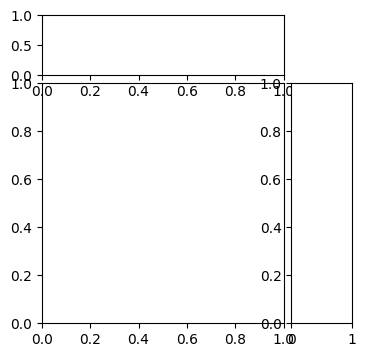

In [17]:
fig = plt.figure(figsize=(4, 4))
gs = mpl.gridspec.GridSpec(2, 2, width_ratios=[4, 1], height_ratios=[1, 4], wspace=0.05, hspace=0.05)
ax0 = fig.add_subplot(gs[1, 0])
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 1])

##### ColorPlots

Text(0.5, 0, '$x$')

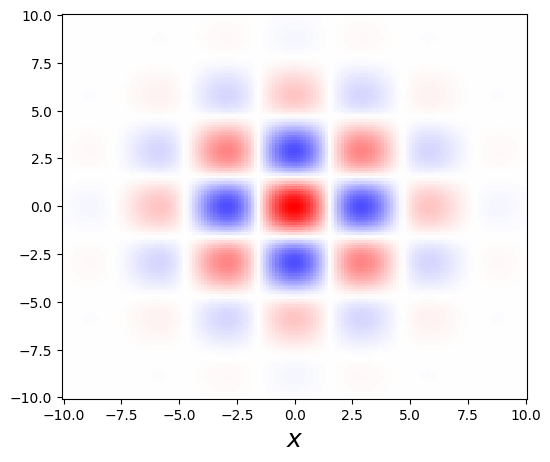

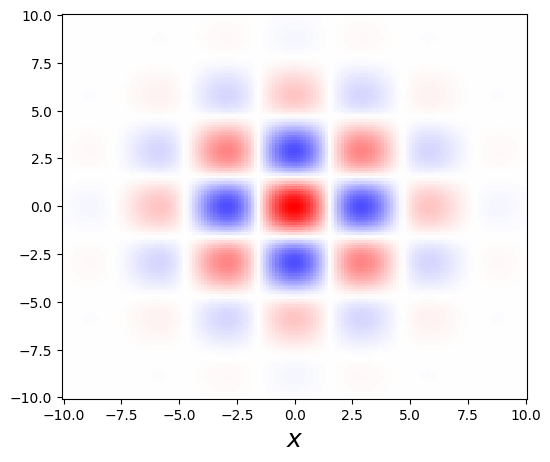

In [18]:
x = y = np.linspace(-10, 10, 150)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5)**2-(Y/5)**2)

fig, ax = plt.subplots(figsize=(6, 5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
p = ax.pcolor(X, Y, Z, norm=norm, cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel(r"$x$", fontsize=18)

x = y = np.linspace(-10, 10, 150)
X, Y = np.meshgrid(x, y)
Z = np.cos(X) * np.cos(Y) * np.exp(-(X/5)**2-(Y/5)**2)

fig, ax = plt.subplots(figsize=(6, 5))

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())
p = ax.pcolor(X, Y, Z, norm=norm, cmap=mpl.cm.bwr)

ax.axis('tight')
ax.set_xlabel(r"$x$", fontsize=18)

##### 3D Plots

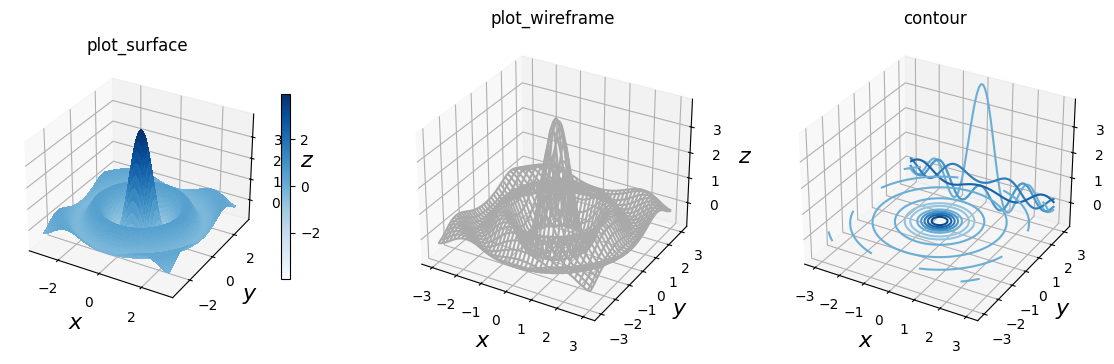

In [20]:
fig, axes = plt.subplots(1, 3, figsize=(14, 4), subplot_kw={'projection': '3d'})

def title_and_labels(ax, title):
    ax.set_title(title)
    ax.set_xlabel("$x$", fontsize=16)
    ax.set_ylabel("$y$", fontsize=16)
    ax.set_zlabel("$z$", fontsize=16)

x = y = np.linspace(-3, 3, 74)
X, Y = np.meshgrid(x, y)

R = np.sqrt(X**2 + Y**2)
Z = np.sin(4 * R) / R

norm = mpl.colors.Normalize(-abs(Z).max(), abs(Z).max())

p = axes[0].plot_surface(X, Y, Z, rstride=1, cstride=1,
linewidth=0, antialiased=False, norm=norm, cmap=mpl.cm.Blues)

cb = fig.colorbar(p, ax=axes[0], shrink=0.6)
title_and_labels(axes[0], "plot_surface")

p = axes[1].plot_wireframe(X, Y, Z, rstride=2, cstride=2,
color="darkgrey")
title_and_labels(axes[1], "plot_wireframe")

cset = axes[2].contour(X, Y, Z, zdir='z', offset=0, norm=norm,
cmap=mpl.cm.Blues)
cset = axes[2].contour(X, Y, Z, zdir='y', offset=3, norm=norm,
cmap=mpl.cm.Blues)
title_and_labels(axes[2], "contour")